### Project 3

### Determine certain matrices to identify the star restaurants and generate recommendations .

#### Importing, Understanding, and Inspecting Data 

In [1]:
# Import necessary library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
import os 

In [2]:
# Check working directory

os.getcwd()

'C:\\Users\\jeeva\\Documents\\Yamuna\\Learning\\Capstone\\Proj 3\\StarRestaurants'

In [3]:
# Read the dataset to Determine certain matrices to identify the star restaurants and generate recommendations .

StarRestaurant = pd.read_excel("data.xlsx")
StarRestaurant.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243


####  Data Preliminary analysis:

#### 1. Perform preliminary data inspection and report the findings as the structure of the data, missing values, duplicates cleaning variable names etc.

In [4]:
# View the dataset shape

StarRestaurant.shape

(9551, 19)

In [5]:
# View all the columns present in the dataset

StarRestaurant.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Price range', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes'],
      dtype='object')

In [6]:
# View the datatype of all columns present in the dataset

StarRestaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9550 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Price range           9551 non-null   int64  
 15  Aggregate rating     

In [7]:
# View the descriptive statistics of the dataframe
# Five point summary of continuous variables 

StarRestaurant.describe(include = 'all').round()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
count,9551.0,9550,9551.0,9551,9551,9551,9551,9551.0,9551.0,9542,9551.0,9551,9551,9551,9551.0,9551.0,9551,9551,9551.0
unique,NaN,7445,NaN,141,8918,1208,1265,NaN,NaN,1825,NaN,12,2,2,NaN,NaN,6,6,NaN
top,NaN,Cafe Coffee Day,NaN,New Delhi,"Dilli Haat, INA, New Delhi",Connaught Place,"Connaught Place, New Delhi",NaN,NaN,North Indian,NaN,Indian Rupees(Rs.),No,No,NaN,NaN,Orange,Average,NaN
freq,NaN,83,NaN,5473,11,122,122,NaN,NaN,936,NaN,8652,8393,7100,NaN,NaN,3737,3737,NaN
mean,9051128.0,NaN,18.0,NaN,NaN,NaN,NaN,64.0,26.0,NaN,1199.0,NaN,NaN,NaN,2.0,3.0,NaN,NaN,157.0
std,8791521.0,NaN,57.0,NaN,NaN,NaN,NaN,41.0,11.0,NaN,16121.0,NaN,NaN,NaN,1.0,2.0,NaN,NaN,430.0
min,53.0,NaN,1.0,NaN,NaN,NaN,NaN,-158.0,-41.0,NaN,0.0,NaN,NaN,NaN,1.0,0.0,NaN,NaN,0.0
25%,301962.0,NaN,1.0,NaN,NaN,NaN,NaN,77.0,28.0,NaN,250.0,NaN,NaN,NaN,1.0,2.0,NaN,NaN,5.0
50%,6004089.0,NaN,1.0,NaN,NaN,NaN,NaN,77.0,29.0,NaN,400.0,NaN,NaN,NaN,2.0,3.0,NaN,NaN,31.0
75%,18352292.0,NaN,1.0,NaN,NaN,NaN,NaN,77.0,29.0,NaN,700.0,NaN,NaN,NaN,2.0,4.0,NaN,NaN,131.0


In [8]:
# Update/ Rename the column names in the dataset

# StarRestaurant_new = StarRestaurant.rename(columns = {"Restaurant ID":"Restaurant_ID","Restaurant Name":"Restaurant_Name",
#                                                 "Country Code":"Country_Code","Locality Verbose":"Locality_Verbose",
#                                                 "Average Cost for two":"Average_Cost_for_two","Has Table booking":"Has_Table_booking",
#                                                 "Has Online delivery":"Has_Online_delivery","Price range":"Price_range",
#                                                 "Aggregate rating":"Aggregate_rating","Rating color":"Rating_color",
#                                                 "Rating text":"Rating_text"})

In [9]:
# Update/ Rename the column names in the dataset

StarRestaurant.columns= StarRestaurant.columns.str.replace(' ','_')

In [10]:
# View the new column names in the dataset

StarRestaurant.columns

Index(['Restaurant_ID', 'Restaurant_Name', 'Country_Code', 'City', 'Address',
       'Locality', 'Locality_Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average_Cost_for_two', 'Currency', 'Has_Table_booking',
       'Has_Online_delivery', 'Price_range', 'Aggregate_rating',
       'Rating_color', 'Rating_text', 'Votes'],
      dtype='object')

In [11]:
# View the number of Null values in each column

print("Number of Null Values in each column")
NullValues = StarRestaurant.isnull().sum(axis=0)
NullValues

Number of Null Values in each column


Restaurant_ID           0
Restaurant_Name         1
Country_Code            0
City                    0
Address                 0
Locality                0
Locality_Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average_Cost_for_two    0
Currency                0
Has_Table_booking       0
Has_Online_delivery     0
Price_range             0
Aggregate_rating        0
Rating_color            0
Rating_text             0
Votes                   0
dtype: int64

In [12]:
# Restaurant Name and Cuisines have null values.
# Null values will be replaced by the Modal values as Restaurant Name and Cuisines are categorical variables

In [13]:
# View the differnt Restaurants and unique counts

StarRestaurant.Restaurant_Name.value_counts()

Cafe Coffee Day                    83
Domino's Pizza                     79
Subway                             63
Green Chick Chop                   51
McDonald's                         48
                                   ..
The Treat                           1
Mikky Restaurant                    1
Yeoh                                1
Ricks Bar - The Taj Mahal Hotel     1
Martin's Corner                     1
Name: Restaurant_Name, Length: 7445, dtype: int64

In [14]:
# View the differnt types of Cuisines and count 

StarRestaurant.Cuisines.value_counts()

North Indian                                936
North Indian, Chinese                       511
Fast Food                                   354
Chinese                                     354
North Indian, Mughlai                       334
                                           ... 
Italian, Continental, Fast Food, Chinese      1
Cafe, Fast Food, Italian, Mexican             1
American, Breakfast, Hawaiian                 1
Italian, Continental, North Indian, Cafe      1
Chinese, Japanese, Sushi                      1
Name: Cuisines, Length: 1825, dtype: int64

In [15]:
# Manually : Categorical NA's - Cuisines and Restaurant Name field is imputed with modal values

for i in StarRestaurant : 
    if StarRestaurant[i].dtype=='object': 
        StarRestaurant[i].fillna(StarRestaurant[i].mode()[0], inplace=True)
    
StarRestaurant.isnull().sum()

Restaurant_ID           0
Restaurant_Name         0
Country_Code            0
City                    0
Address                 0
Locality                0
Locality_Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average_Cost_for_two    0
Currency                0
Has_Table_booking       0
Has_Online_delivery     0
Price_range             0
Aggregate_rating        0
Rating_color            0
Rating_text             0
Votes                   0
dtype: int64

In [16]:
# View the number of columns and rows in the dataset

StarRestaurant.shape

(9551, 19)

In [17]:
# View the number of duplicate records in the dataframe

StarRestaurant.duplicated().sum()

0

In [18]:
# There are NO duplicate values in the dataset

#### 2. Based on the findings from the previous questions identify duplicates and remove them.

In [19]:
# No Missing, No Duplicate Values, No null values are there in the data set StarRestaurant

#### Read the dataset with country code and Merge it with the StarRestaurant dataset.

In [20]:
# Read the dataset with Country code

Country_code = pd.read_excel("Country-Code.xlsx")
Country_code

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [21]:
# Update/ Rename the column names in the dataset

Country_code_new = Country_code.rename(columns = {"Country Code":"Country_Code"})

In [22]:
# View the new names of the dataset Country code.

Country_code_new.columns

Index(['Country_Code', 'Country'], dtype='object')

In [23]:
# Merge the two dataset with matching Country code field

StarRestaurant_country = pd.merge(StarRestaurant, Country_code_new, on='Country_Code')
StarRestaurant_country.head()

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,Indonesia
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605,Indonesia
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395,Indonesia
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243,Indonesia


#### Fill the 0 values in Latitude and Longitude fields with the respective city's median longitude and latitude values.

In [24]:
# View the list of Restaurants with 0 values for Latitude and Longitude

StarRestaurant_country[(StarRestaurant_country.Longitude ==0)|(StarRestaurant_country.Latitude == 0)]

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country
18,18409146,Fish Streat,94,Jakarta,"Jl. Tanjung Duren Utara III, Blok M Kav. 32, T...",Tanjung Duren,"Tanjung Duren, Jakarta",0.000000,0.0,"Seafood, Western",100000,Indonesian Rupiah(IDR),No,No,3,3.4,Orange,Average,152,Indonesia
222,18255171,Tokyo Mon Amour,1,New Delhi,"28, Main Market, Lodhi Colony, New Delhi",Lodhi Colony,"Lodhi Colony, New Delhi",0.000000,0.0,"Japanese, French",2200,Indian Rupees(Rs.),Yes,No,4,3.1,Orange,Average,10,India
237,18466978,Gatsby Kitchen & Bar by Club BW,1,New Delhi,"N-4, N Block Market, Greater Kailash (GK) 1, N...",Greater Kailash (GK) 1,"Greater Kailash (GK) 1, New Delhi",0.000000,0.0,"Continental, North Indian",2100,Indian Rupees(Rs.),Yes,No,4,3.5,Yellow,Good,22,India
244,3400325,MoMo Cafe,1,Agra,"Courtyard by Marriott Agra, Phase 2, Fatehabad...","Courtyard by Marriott Agra, Tajganj","Courtyard by Marriott Agra, Tajganj, Agra",0.000000,0.0,"North Indian, European",2000,Indian Rupees(Rs.),No,No,4,4.0,Green,Very Good,45,India
248,18022206,Antares,1,Goa,"Small Vagator Beach, Ozran, Vagator, Goa",Vagator,"Vagator, Goa",0.000000,0.0,Seafood,2000,Indian Rupees(Rs.),No,No,4,4.2,Green,Very Good,367,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8633,18448390,Chaiwaalas,1,Noida,"D Block, Sector 63, Noida",Sector 63,"Sector 63, Noida",0.000000,0.0,"Fast Food, Beverages",100,Indian Rupees(Rs.),No,No,1,0.0,White,Not rated,0,India
8666,3400391,Chapter 1 Cafe,1,Agra,"1374 K/1375 K, 2nd floor, Dinesh Nagar, Fatehb...",Tajganj,"Tajganj, Agra",0.000000,0.0,"Cafe, Italian, Mexican, North Indian, Continental",0,Indian Rupees(Rs.),No,No,1,3.9,Yellow,Good,98,India
8671,3900245,Deena Chat Bhandar,1,Varanasi,"D-47/184, Luxa Road, Dashaswmedh Road, Varanasi",Dashaswmedh Road,"Dashaswmedh Road, Varanasi",0.000000,0.0,Street Food,0,Indian Rupees(Rs.),No,No,1,3.8,Yellow,Good,78,India
8699,5800316,Cricket Club Cafe,191,Colombo,"12 Flower Road, Kollupitiya, Colombo 03","Kollupitiya, Colombo 03","Kollupitiya, Colombo 03, Colombo",0.000000,0.0,"Continental, American, Seafood",3000,Sri Lankan Rupee(LKR),No,No,3,4.2,Green,Very Good,171,Sri Lanka


In [25]:
# View the city names with missing(0) logitude and latitude values

Missing_city = StarRestaurant_country[(StarRestaurant_country.Longitude ==0)|(StarRestaurant_country.Latitude == 0)].City.unique()


In [26]:
StarRestaurant_country[(StarRestaurant_country.Longitude ==0)|(StarRestaurant_country.Latitude == 0)].City.unique()

array(['Jakarta', 'New Delhi', 'Agra', 'Goa', 'Noida', 'Guwahati',
       'Mangalore', 'Vizag', 'Ludhiana', 'Mysore', 'Patna', 'Vadodara',
       'Lucknow', 'Bhubaneshwar', 'Bhopal', 'Nashik', 'Ranchi',
       'Varanasi', 'Aurangabad', 'Allahabad', 'Dehradun', 'Faridabad',
       'Gurgaon', 'Kanpur', 'Amritsar', 'Nagpur', 'Colombo', 'Auckland'],
      dtype=object)

In [27]:
len(Missing_city)

28

In [28]:
# Finding the longitude and latitude values for the missing city's by calculating the aggregate and mean

lat_n_long = StarRestaurant_country.groupby('City').agg('mean')[['Latitude','Longitude']].loc[Missing_city]
Missing_city_loc = {x:tuple(lat_n_long.loc[x]) for x in Missing_city}


In [29]:
# Fill the missing values(0) for longitude and Latitude with the city's longitude and latitude

for i in StarRestaurant_country.index:
    if (StarRestaurant_country.loc[i,'Latitude'] == 0) or (StarRestaurant_country.loc[i , 'Longitude'] == 0):
        city = StarRestaurant_country.loc[i , 'City']
        lat, long = Missing_city_loc[city]
        StarRestaurant_country.loc[i,'Latitude'] = lat
        StarRestaurant_country.loc[i,'Longitude'] = long

In [30]:
# All the zeros in the missing Longitude and Latitude are filled with aggregate Mean values.


((StarRestaurant_country.Latitude == 0) | (StarRestaurant_country.Longitude == 0)).sum()

0

In [31]:
# Save the dataframe to a new Excel document

StarRestaurant_country.to_excel("StarRestaurant_country.xlsx")

### Performing EDA:

#### 3. Explore the geographical distribution of the restaurants, finding out the cities with maximum / minimum number of restaurants.

In [32]:
# View the Number of Restaurants in Each Country 

Country_Count = StarRestaurant_country.Country.value_counts()
Country_Count

India             8652
United States      434
United Kingdom      80
South Africa        60
UAE                 60
Brazil              60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Sri Lanka           20
Qatar               20
Singapore           20
Canada               4
Name: Country, dtype: int64

In [33]:
Country_Count_Rest = StarRestaurant_country.groupby(['Country_Code','Country']).agg( Count = ('Restaurant_ID','count'))
Country_Count_Rest.sort_values(by='Count',ascending=False)

,,Count
Country_Code,Country,
1,India,8652
216,United States,434
215,United Kingdom,80
30,Brazil,60
189,South Africa,60
214,UAE,60
148,New Zealand,40
208,Turkey,34
14,Australia,24


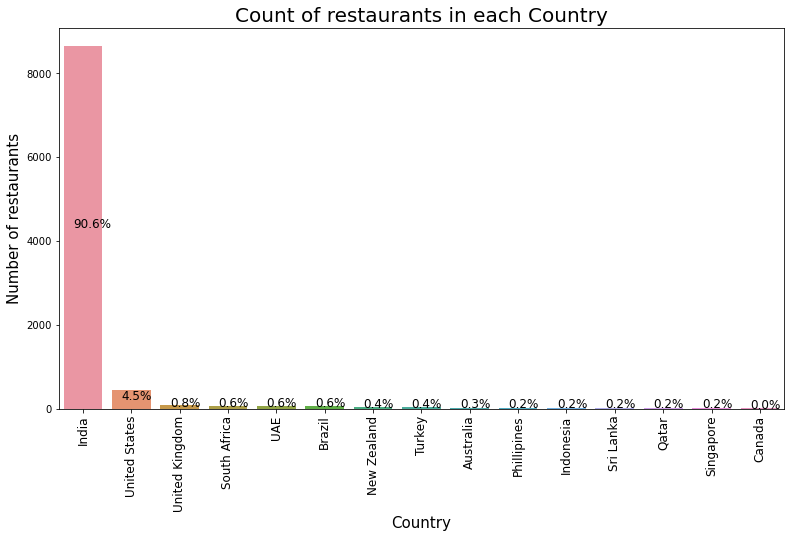

In [34]:
# View the Number of percentage of number of Restaurants in each country

plt.figure(figsize=(13,7))
Country_Count = pd.DataFrame(StarRestaurant_country.Country.value_counts()).rename({'Country':'Freq'}, axis=1)
Country_Count['Perc'] = (Country_Count.Freq/Country_Count.Freq.sum()*100).round(1)

sns.countplot(x='Country', data=StarRestaurant_country , order=Country_Count.index)

for i in range(len(Country_Count)):
    plt.annotate(str(Country_Count.Perc[i]) +'%', xy = (i -0.2, int(Country_Count.Freq[i]/2)), fontsize=12)
plt.xticks(size=12, rotation=90)
plt.xlabel('Country', size = 15)
plt.ylabel('Number of restaurants', size = 15)
plt.title('Count of restaurants in each Country', size=20)
plt.show()

In [35]:
print("Country with Maximum number of Restaurants is : ",Country_Count.index[0])

Country with Maximum number of Restaurants is :  India


In [36]:
print("Country with Minimum number of Restaurants is : ",Country_Count.index[len(Country_Count)-1])


Country with Minimum number of Restaurants is :  Canada


<ipython-input-37-12473ac435d5>:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  country_vc = pd.Series()


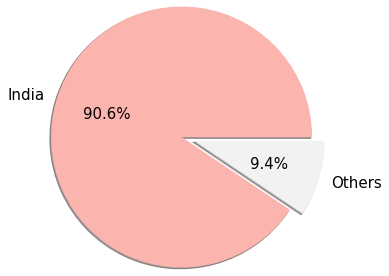

In [37]:
# View the percentage of Indian Restaurant count and the restaurants in other countries.

plt.figure(figsize = (5,3))
country_vc = pd.Series()
country_vc['India'] = len(StarRestaurant_country[StarRestaurant_country.Country == 'India'])
country_vc['Others'] = len(StarRestaurant_country[StarRestaurant_country.Country != 'India'])
country_vc.plot.pie(radius = 2,autopct = '%1.1f%%' , textprops = {'size':15 }, explode= [0.1,0.1], shadow = True, cmap ='Pastel1')
plt.xticks(size = 12, rotation = 10)
plt.ylabel('')
plt.show()

In [38]:
# Approximately 90% of the data belongs to India

In [39]:
city_dist = StarRestaurant_country.groupby(['Country','City']).agg(Count = ('Restaurant_ID','count'))
city_dist.sort_values(by='Count',ascending=False)

Count
Country       City                 
India         New Delhi        5473
              Gurgaon          1118
              Noida            1080
              Faridabad         251
              Ghaziabad          25
...                             ...
              Panchkula           1
Australia     Balingup            1
Indonesia     Bandung             1
Phillipines   Quezon City         1
United States Winchester Bay      1

[141 rows x 1 columns]

In [40]:
# City with Maximum number of restaurants in New Delhi

In [41]:
# View the cities with Minumum number of Restaurants

# Minimum number of restaurant in following cities 
min_cnt_rest = city_dist[city_dist['Count']==1]
min_cnt_rest

Count
Country       City                   
Australia     Armidale              1
              Balingup              1
              Beechworth            1
              Dicky Beach           1
              East Ballina          1
              Flaxton               1
              Forrest               1
              Huskisson             1
              Inverloch             1
              Lakes Entrance        1
              Lorn                  1
              Macedon               1
              Mayfield              1
              Middleton Beach       1
              Montville             1
              Palm Cove             1
              Paynesville           1
              Penola                1
              Phillip Island        1
              Tanunda               1
              Trentham East         1
              Victor Harbor         1
Canada        Chatham-Kent          1
              Consort               1
              Vineland Station      1
              Yorkton               1
India         Mohali                1
              Panchkula             1
Indonesia     Bandung               1
Phillipines   Quezon City           1
              Tagaytay City         1
South Africa  Randburg              1
United States Clatskanie            1
              Cochrane              1
              Fernley               1
              Lakeview              1
              Lincoln               1
              Mc Millan             1
              Miller                1
              Monroe                1
              Ojo Caliente          1
              Potrero               1
              Princeton             1
              Vernonia              1
              Weirton               1
              Winchester Bay        1

In [42]:
# Filter Indian restaurant data from the dataset to explore more 

StartRestaurant_India = StarRestaurant_country[StarRestaurant_country.Country=='India']
StartRestaurant_India = StartRestaurant_India.reset_index()
StartRestaurant_India.head()

,index,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,...,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country
0,21,2701,Orient Express - Taj Palace Hotel,1,New Delhi,"Taj Palace Hotel, Diplomatic Enclave, Chanakya...","The Taj Palace Hotel, Chanakyapuri","The Taj Palace Hotel, Chanakyapuri, New Delhi",77.170087,28.595008,...,8000,Indian Rupees(Rs.),Yes,No,4,4.0,Green,Very Good,145,India
1,22,309548,Tian - Asian Cuisine Studio - ITC Maurya,1,New Delhi,"ITC Maurya, Diplomatic Enclave, Chanakyapuri, ...","ITC Maurya, Chanakyapuri","ITC Maurya, Chanakyapuri, New Delhi",77.173455,28.597351,...,7000,Indian Rupees(Rs.),No,No,4,4.1,Green,Very Good,188,India
2,23,2742,Bukhara - ITC Maurya,1,New Delhi,"ITC Maurya, Chanakyapuri, New Delhi","ITC Maurya, Chanakyapuri","ITC Maurya, Chanakyapuri, New Delhi",77.173724,28.597466,...,6500,Indian Rupees(Rs.),No,No,4,4.4,Green,Very Good,2826,India
3,24,301523,Nostalgia at 1911 Brasserie - The Imperial,1,New Delhi,"The Imperial, Janpath, New Delhi","The Imperial, Janpath","The Imperial, Janpath, New Delhi",77.218187,28.625445,...,6000,Indian Rupees(Rs.),Yes,No,4,3.2,Orange,Average,12,India
4,25,2724,1911 - The Imperial,1,New Delhi,"The Imperial, Janpath, New Delhi","The Imperial, Janpath","The Imperial, Janpath, New Delhi",77.218185,28.625443,...,6000,Indian Rupees(Rs.),Yes,No,4,3.9,Yellow,Good,272,India


In [43]:
# View the number of Restaurants in each city of India

print("Count of restaurants at unique Cities")

City_Count=StartRestaurant_India['City'].value_counts().sort_values(ascending=False)
City_Count

Count of restaurants at unique Cities


New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Ahmedabad         21
Guwahati          21
Amritsar          21
Lucknow           21
Ranchi            20
Mumbai            20
Jaipur            20
Mysore            20
Dehradun          20
Coimbatore        20
Bhopal            20
Aurangabad        20
Vadodara          20
Nashik            20
Indore            20
Patna             20
Kochi             20
Ludhiana          20
Puducherry        20
Chennai           20
Kolkata           20
Vizag             20
Surat             20
Pune              20
Nagpur            20
Mangalore         20
Kanpur            20
Bangalore         20
Goa               20
Agra              20
Varanasi          20
Allahabad         20
Chandigarh        18
Hyderabad         18
Secunderabad       2
Mohali             1
Panchkula          1
Name: City, dtype: int64

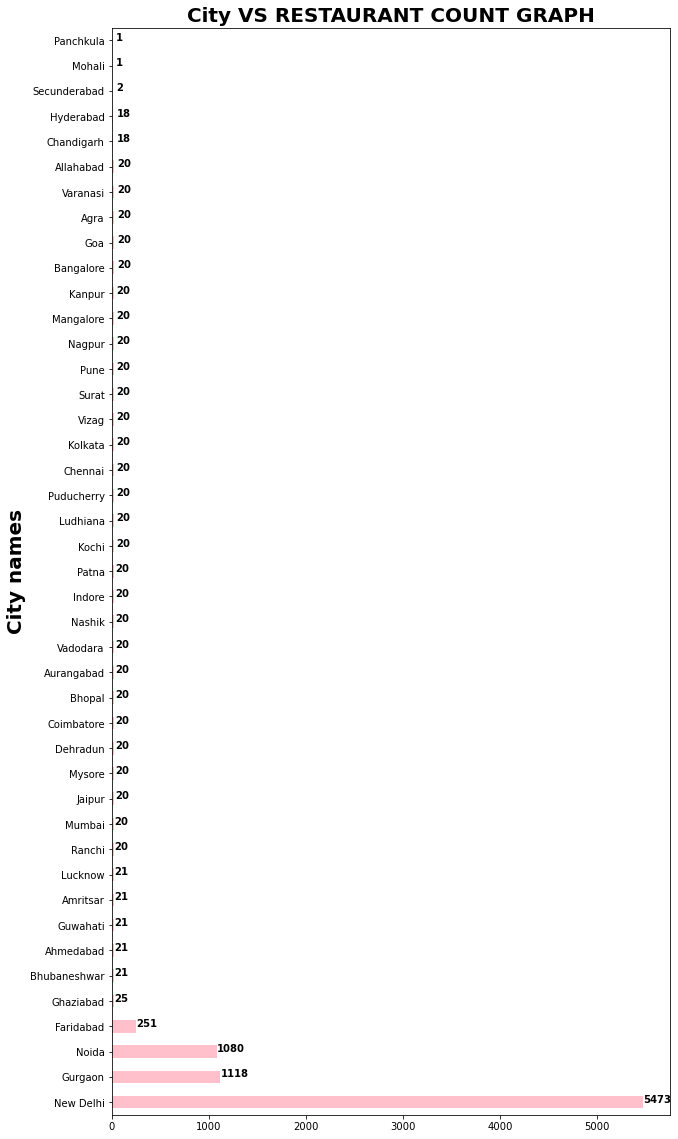

In [44]:
# View the total number of restaurants City wise in India.

fig=plt.figure(figsize=(10,20))
City_Count.plot(kind="barh",fontsize=10, color = 'pink')
plt.ylabel("City names",fontsize=20,color="black",fontweight='bold')
plt.title("City VS RESTAURANT COUNT GRAPH",fontsize=20,color="BLACK",fontweight='bold')
for v in range(len(City_Count)):
    #plt.text(x axis location ,y axis location ,text value ,other parameters......)
    plt.text(v+City_Count[v],v,City_Count[v],fontsize=10,color="BLACK",fontweight='bold')

In [45]:
print("City with Maximum number of Restaurants in India is : ",City_Count.index[0])

City with Maximum number of Restaurants in India is :  New Delhi


In [46]:
print("City with Minumum number of Restaurants in India is : ")

City_Count_Min=min(City_Count)
for x,y in City_Count.items():
    if(y==City_Count_Min):
        print(x)

City with Minumum number of Restaurants in India is : 
Mohali
Panchkula


#### 4. Restaurant franchise is a thriving venture. So, it becomes very important to explore the franchise with most national presence.

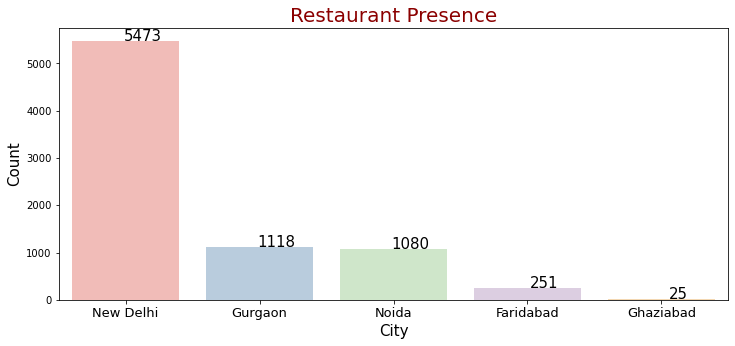

In [47]:
# View the Top 5 cities with Maximum number of Restaurants in India

plt.figure(figsize = (12,5))
City_Count = StartRestaurant_India.City.value_counts()[:5]
g = sns.barplot(x = City_Count.index, y = City_Count.values, palette = 'Pastel1')
g.set_xticklabels(g.get_xticklabels(),fontsize = 13)
for i in range(5):
    value = City_Count[i]
    g.text(y = value - 2,x = i +0.125 , s = value, color='black', ha="center",fontsize = 15)
g.set_ylabel('Count', fontsize = 15)
g.set_xlabel('City', fontsize=15)
g.set_title('Restaurant Presence', fontsize = 20, color = 'darkred')
plt.show()

In [48]:
# View the Restaurants with highest number of Franchise in India

Res_Count=StartRestaurant_India['Restaurant_Name'].value_counts().sort_values(ascending=False)
Res_Count

Cafe Coffee Day     84
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
                    ..
Bombay Vada Pav      1
The FLIP Cafe        1
Prabhu               1
Salt N' Pepper       1
Royal Rasoi          1
Name: Restaurant_Name, Length: 6603, dtype: int64

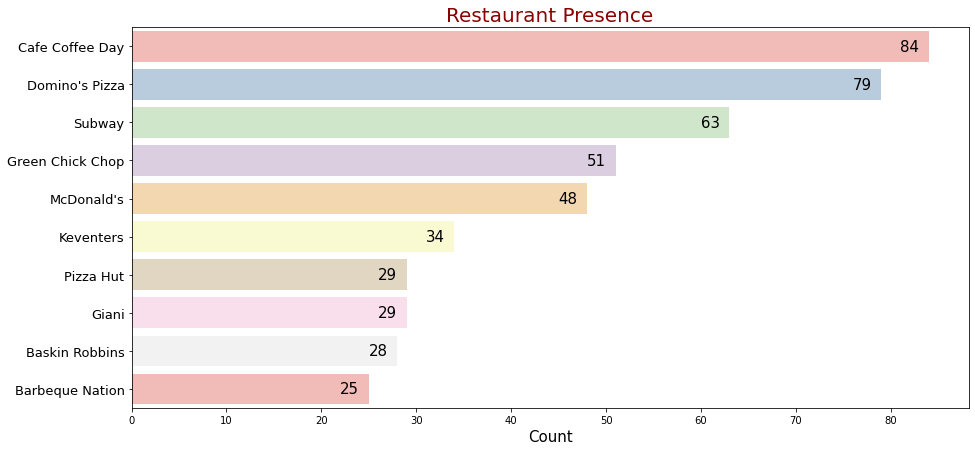

In [49]:
# View the Top 10 Restaurants with Maximum number of Franchise in India

plt.figure(figsize = (15,7))
Res_Count = StartRestaurant_India.Restaurant_Name.value_counts()[:10]
g = sns.barplot(y = Res_Count.index, x = Res_Count.values, palette = 'Pastel1')
g.set_yticklabels(g.get_yticklabels(),fontsize = 13)
for i in range(10):
    value = Res_Count[i]
    g.text(x = value - 2,y = i +0.125 , s = value, color='black', ha="center",fontsize = 15)
g.set_xlabel('Count', fontsize = 15)
g.set_title('Restaurant Presence', fontsize = 20, color = 'darkred')
plt.show()

In [50]:
# Filter Restaurant data other than India from the dataset to explore more 

StartRestaurant_other = StarRestaurant_country[StarRestaurant_country.Country!='India']
StartRestaurant_other = StartRestaurant_other.reset_index()
StartRestaurant_other.shape

(899, 21)

In [51]:
# View the number of Restaurants in each city Other than India

print("Count of restaurants at unique Cities")

Other_City_Count=StartRestaurant_other['City'].value_counts().sort_values(ascending=True)
Other_City_Count

Count of restaurants at unique Cities


Flaxton          1
East Ballina     1
Consort          1
Beechworth       1
Paynesville      1
                ..
Singapore       20
Edinburgh       20
Sioux City      20
Birmingham      20
Pretoria        20
Name: City, Length: 98, dtype: int64

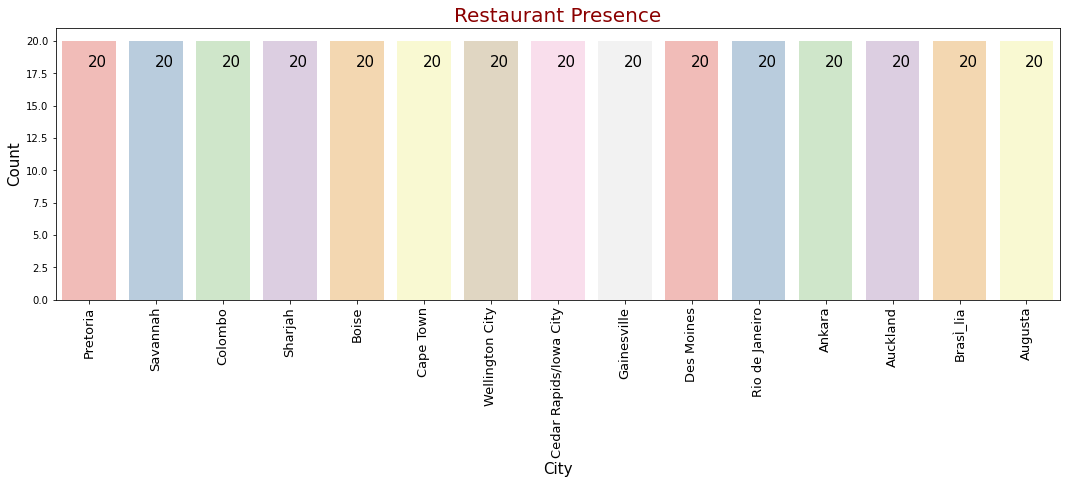

In [52]:
# View the Top 10 cities with Maximum number of Restaurants Outside India

plt.figure(figsize = (18,5))
Other_City_Count = StartRestaurant_other.City.value_counts()[:15]
g = sns.barplot(x = Other_City_Count.index, y = Other_City_Count.values, palette = 'Pastel1')
g.set_xticklabels(g.get_xticklabels(),fontsize = 13,rotation = 90 )
for i in range(15):
    value = Other_City_Count[i]
    g.text(y = value - 2,x = i +0.125 , s = value, color='black', ha="center",fontsize = 15)
g.set_ylabel('Count', fontsize = 15)
g.set_xlabel('City', fontsize=15,)
g.set_title('Restaurant Presence', fontsize = 20, color = 'darkred')
plt.show()

In [53]:
# View the Restaurants with highest number of Franchise Ouside India

Other_Res_Count=StartRestaurant_other['Restaurant_Name'].value_counts().sort_values(ascending=False)
Other_Res_Count

Texas Roadhouse      5
Jamie's Italian      4
Applebee's           4
Gazebo               3
Chaophraya           3
                    ..
Sis Burger           1
Pho Bac              1
Tikka Tonight        1
Barbeque Nation      1
Brooklyn Brothers    1
Name: Restaurant_Name, Length: 860, dtype: int64

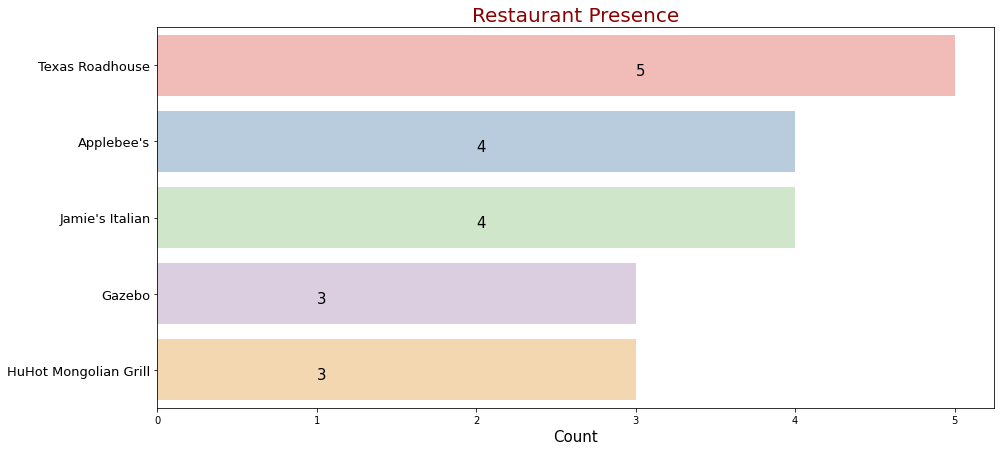

In [54]:
# View the Top 5 Restaurants with Maximum number of Franchise Other than India

plt.figure(figsize = (15,7))
Other_Res_Count = StartRestaurant_other.Restaurant_Name.value_counts()[:5]
g = sns.barplot(y = Other_Res_Count.index, x = Other_Res_Count.values, palette = 'Pastel1')
g.set_yticklabels(g.get_yticklabels(),fontsize = 13)
for i in range(5):
    value = Other_Res_Count[i]
    g.text(x = value - 2,y = i +0.125 , s = value, color='black', ha="left",fontsize = 15)
g.set_xlabel('Count', fontsize = 15)
g.set_title('Restaurant Presence', fontsize = 20, color = 'darkred')
plt.show()

#### 5.  What is the ratio between restaurants that allow table booking vs that do not allow table booking?

In [55]:
print("No. of Table booking code :", StarRestaurant_country['Has_Table_booking'].nunique())

No. of Table booking code : 2


In [56]:
# View the Number of Restaurants has Table booking option

Table_booking = StarRestaurant_country.Has_Table_booking.value_counts()
Table_booking

No     8393
Yes    1158
Name: Has_Table_booking, dtype: int64

Text(0.5, 1.0, 'Restaurants providing Table booking facility:')

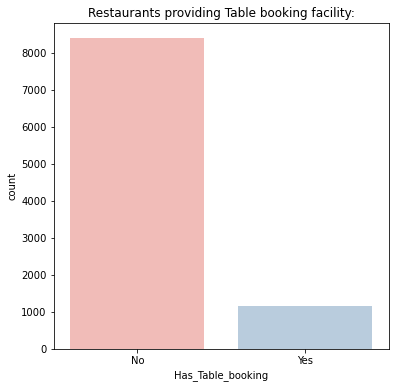

In [57]:
# View the Restaurants count Has table booking

sns.countplot(x=StarRestaurant_country['Has_Table_booking'],palette = "Pastel1")
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title('Restaurants providing Table booking facility:')

In [58]:
# View the distribution of differnt Table booking code

#plt.pie(x=Table_booking.values,labels=Table_booking.index, autopct='%.2f' ,radius=2 );
#plt.pie(x=[0,1], colors='w')

In [59]:
# Ratio between restaurants allowing table booking and those which dont
tbl_book_y = StarRestaurant_country[StarRestaurant_country['Has_Table_booking']== 'Yes']['Restaurant_ID'].count()
tbl_book_n = StarRestaurant_country[StarRestaurant_country['Has_Table_booking']== 'No']['Restaurant_ID'].count()
print('Ratio between restaurants that allow table booking vs. those that do not allow table booking: ',
      round((tbl_book_y/tbl_book_n),2))

Ratio between restaurants that allow table booking vs. those that do not allow table booking:  0.14


#### 6. What is the percentage of restaurants providing online delivery?

In [60]:
print("No. of Online delivery code :", StarRestaurant_country['Has_Online_delivery'].nunique())

No. of Online delivery code : 2


In [61]:
# View the Number of Restaurants which provide Online delivery

Online_delivery = StarRestaurant_country.Has_Online_delivery.value_counts()
Online_delivery


No     7100
Yes    2451
Name: Has_Online_delivery, dtype: int64

Text(0.5, 1.0, 'Restaurants providing Online delivery:')

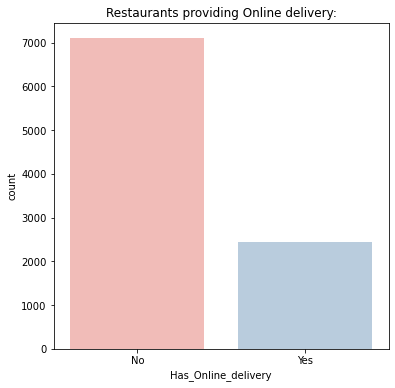

In [62]:
# View the Restaurants count has online delivery

sns.countplot(x=StarRestaurant_country['Has_Online_delivery'],palette = "Pastel1")
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title('Restaurants providing Online delivery:')

In [63]:
# View the distribution of differnt Online delivery option

#plt.pie(x=Online_delivery.values,labels=Online_delivery.index, autopct='%.2f' ,radius=2 );
#plt.pie(x=[0,1], colors='w')

In [64]:
# View the Percentage of restaurants providing online deliery

order_on = StarRestaurant_country[StarRestaurant_country['Has_Online_delivery'] == 'Yes']['Restaurant_ID'].count()
order_off = StarRestaurant_country[StarRestaurant_country['Has_Online_delivery'] == 'No']['Restaurant_ID'].count()
print('Percentage of restaurants providing online delivery : {} %'.format((round(order_on/len(StarRestaurant_country),3)*100)))

Percentage of restaurants providing online delivery : 25.7 %


#### Create a cross tab with number of Restaurants with online delivery options and table booking options

In [65]:
# View the Cross tab with number of restaurants which has online delivery and table booking options

pd.crosstab(StarRestaurant_country.Has_Online_delivery,StarRestaurant_country.Has_Table_booking)

Has_Table_booking,No,Yes
Has_Online_delivery,,
No,6377,723
Yes,2016,435


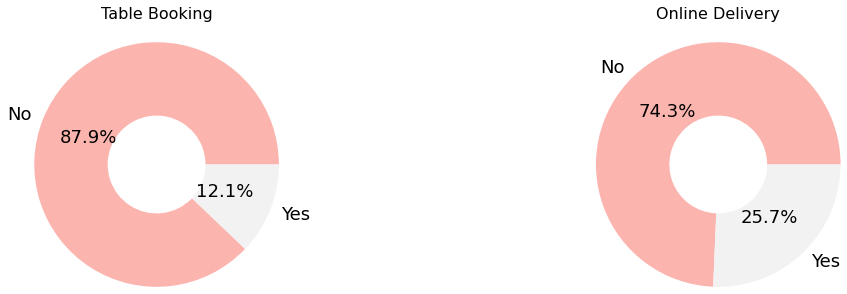

In [66]:
# View the Percentage of Restaurants which provides online delivery and table booking options

f,axes = plt.subplots(1,2,figsize = (15,5))
StarRestaurant_country.Has_Table_booking.value_counts().plot.pie(ax = axes[0],autopct = '%0.1f%%', radius = 1.25, wedgeprops = {'width' : 0.75}, cmap = 'Pastel1',
textprops = {'size' : 18,} )
#axes[0].set_xticklabels(labels = axes[0].get_xticklabels(),rotation = 0)
axes[0].set_title('Table Booking\n',fontsize = 16)
axes[0].set_ylabel('')
StarRestaurant_country.Has_Online_delivery.value_counts().plot.pie(ax = axes[1], autopct = '%0.1f%%', radius = 1.25,wedgeprops = {'width' : 0.75}, cmap = 'Pastel1',
textprops = {'size' : 18} )
axes[1].set_title('Online Delivery\n', fontsize = 16)
#axes[1].set_xticklabels(labels = axes[1].get_xticklabels(),rotation = 0)
axes[1].set_ylabel('')
plt.tight_layout(w_pad = 20, h_pad = 10, pad = 4)
plt.show()

#### Create dummy variables for Has online delivery and Online booking fields for futher analysis

In [67]:
# create dummy vaiables for Has online delivery and online booking fields

dummy = ['Has_Table_booking','Has_Online_delivery']
StarRestaurant_country_dummy = pd.get_dummies(StarRestaurant_country,columns=dummy,drop_first=True)
StarRestaurant_country_dummy.head()

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country,Has_Table_booking_Yes,Has_Online_delivery_Yes
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),3,4.1,Green,Very Good,1498,Indonesia,0,0
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),3,4.6,Dark Green,Excellent,873,Indonesia,0,0
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),3,4.9,Dark Green,Excellent,605,Indonesia,0,0
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),3,4.2,Green,Very Good,395,Indonesia,0,0
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),3,4.3,Green,Very Good,243,Indonesia,0,0


In [68]:
# 0 indicates 'NO', 1 indicates 'YES'. 
# Has_online_delivery_yes and Has_online_booking_yes fields are created in the dataset

In [69]:
# Saving the file 
StarRestaurant_country_dummy.to_excel("StarRestaurant_country_dummy.xlsx")

#### 7. Is there a difference in no. of votes for the restaurants that deliver and the restaurant that don’t?

In [74]:
Number_of_votes = StarRestaurant_country.groupby('Has_Online_delivery')['Votes'].sum()
Number_of_votes

Has_Online_delivery
No     980731
Yes    517914
Name: Votes, dtype: int64

In [75]:
print('Difference in number of votes for the restaurants that deliver and the restaurants that do not deliver :',Number_of_votes[0] - Number_of_votes[1])

Difference in number of votes for the restaurants that deliver and the restaurants that do not deliver : 462817


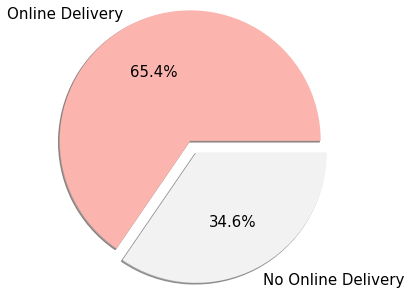

In [77]:
# View the total number of votes that Restaurants deliver and not deliver

plt.figure(figsize = (5,3))
labels = 'Online Delivery','No Online Delivery'
Number_of_votes.plot.pie(radius = 2,autopct = '%1.1f%%' , textprops = {'size':15 }, explode= [0.1,0.1], shadow = True,labels=labels, cmap='Pastel1')
plt.xticks(size = 12, rotation = 10)
plt.ylabel('')

plt.show()

In [82]:
# Number of restaurants with delivery options vs Rating.

#plt.figure(figsize=(15,6))
#sns.countplot(data=StarRestaurant_country[StarRestaurant_country.Aggregate_rating !=0],x='Aggregate_rating',hue='Has_Online_delivery',palette='viridis')
#plt.show()

#### 8. What are the top 10 cuisines served across cities?

In [83]:
# View the differnt types of Cusines

Cuisines = StarRestaurant_country.Cuisines.value_counts()
Cuisines

North Indian                             945
North Indian, Chinese                    511
Fast Food                                354
Chinese                                  354
North Indian, Mughlai                    334
                                        ... 
Cafe, Italian, Continental, Fast Food      1
Nepalese, Tibetan                          1
Cafe, Bakery, Italian                      1
Fast Food, Chinese, Bengali                1
Italian, North Indian, Chinese             1
Name: Cuisines, Length: 1825, dtype: int64

In [84]:
# View the list of top Cusines available in each city

Cuisines_City = StarRestaurant_country.groupby(['City', 'Cuisines']).size()
Cuisines_City.sort_values(ascending=False).head(20)

City       Cuisines                      
New Delhi  North Indian                      658
           North Indian, Chinese             284
           Fast Food                         242
           Chinese                           228
           North Indian, Mughlai             207
           Cafe                              158
           Street Food                       123
           Bakery                            122
           North Indian, Mughlai, Chinese    120
           Bakery, Desserts                  117
Noida      North Indian                      110
Gurgaon    North Indian                      105
New Delhi  Chinese, Fast Food                 99
Noida      North Indian, Chinese              97
New Delhi  Pizza, Fast Food                   92
           Mithai, Street Food                90
           Mughlai                            86
           South Indian                       81
           Bakery, Fast Food                  80
           Chinese, North I

In [87]:
cuis_count_ct = StarRestaurant_country.groupby(['City','Cuisines']).agg( Count = ('Cuisines','count'))
cuis_count_ct.sort_values(by='Count',ascending=False)

Count
City      Cuisines                                                 
New Delhi North Indian                                          658
          North Indian, Chinese                                 284
          Fast Food                                             242
          Chinese                                               228
          North Indian, Mughlai                                 207
...                                                             ...
Dalton    Fast Food                                               1
New Delhi American, Fast Food, Desserts                           1
          American, Finger Food                                   1
          American, Italian, Bakery, Deli, Burger, Sandwi...      1
€¡stanbul World Cuisine, Patisserie, Cafe                         1

[3031 rows x 1 columns]

In [85]:
# Split the Cuisine names with , as delimiter

l = []
for i in StarRestaurant_country.Cuisines.str.split(','):
    l.extend(i)
s = pd.Series([i.strip() for i in l])

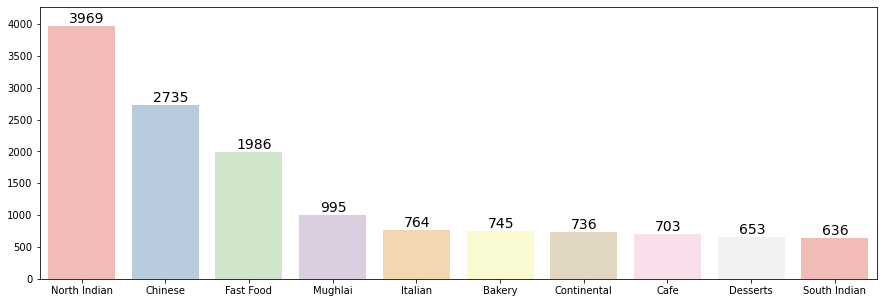

In [90]:
# View the Top 10 cuisines that served acorss different cities

plt.figure(figsize = (15,5))
sns.barplot(x = s.value_counts()[:10].index, y = s.value_counts()[:10], palette = 'Pastel1')
for i in range(10):
    plt.annotate(s.value_counts()[i], xy = (i-0.15,s.value_counts()[i]+50),fontsize = 14)
plt.ylim(0, round(s.value_counts()[0]+300))
plt.show()

#### 9. What is the maximum and minimum no. of cuisines that a restaurant serves? Also, what is the relationship between No. of cuisines served and Ratings

In [91]:
# Split the different cuisines given by the restaurants and store the count in a separate column in the dataframe

StarRestaurant_country['Cusinies_count'] = StarRestaurant_country["Cuisines"].str.split(", ").str.len()
StarRestaurant_country.head()

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,...,Currency,Has_Table_booking,Has_Online_delivery,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country,Cusinies_count
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",...,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia,2
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",...,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,Indonesia,3
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",...,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605,Indonesia,2
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,...,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395,Indonesia,1
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",...,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243,Indonesia,2


In [92]:
# View the maximum number of cuisines given by the restaurants

Max_Cuisines = StarRestaurant_country.Cusinies_count.max()
Max_Cuisines

8

In [93]:
# View the minimum number of cuisines given by the restaurants

Min_Cuisines = StarRestaurant_country.Cusinies_count.min()
Min_Cuisines

1

In [94]:
# View the most served cuisine across the restaurant for each city

cuis_count_ct = StarRestaurant_country.groupby(['City','Cuisines']).agg( Count = ('Cuisines','count'))
cuis_count_ct.sort_values(by='Count',ascending=False)

Count
City      Cuisines                                                 
New Delhi North Indian                                          658
          North Indian, Chinese                                 284
          Fast Food                                             242
          Chinese                                               228
          North Indian, Mughlai                                 207
...                                                             ...
Dalton    Fast Food                                               1
New Delhi American, Fast Food, Desserts                           1
          American, Finger Food                                   1
          American, Italian, Bakery, Deli, Burger, Sandwi...      1
€¡stanbul World Cuisine, Patisserie, Cafe                         1

[3031 rows x 1 columns]

In [95]:
plt.rcParams['figure.figsize'] = (8,3)

<AxesSubplot:xlabel='City,Cuisines'>

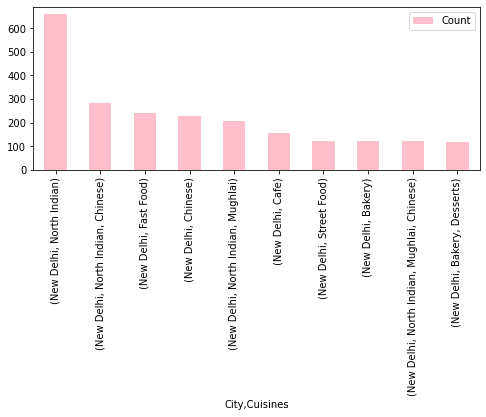

In [98]:
# What are the top 10 cuisines served across cities?
top_10_couisines = StarRestaurant_country.groupby(['City','Cuisines']).agg( Count = ('Cuisines','count'))
df=top_10_couisines.sort_values(by='Count',ascending=False)

df.head(10).plot(kind='bar',color = 'pink' )

C:\Users\jeeva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


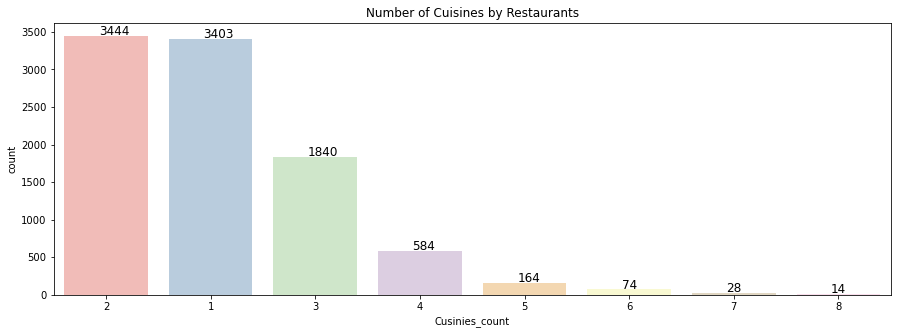

In [102]:
# view the number of restaurants vs number of cuisine count given by them

plt.figure(figsize = (15,5))
vc = StarRestaurant_country.Cusinies_count.value_counts()
sns.countplot('Cusinies_count', data=StarRestaurant_country, order = vc.index, palette = "Pastel1")
for i in range(len(vc)):
    plt.annotate(vc.iloc[i], xy = (i-0.07,vc.iloc[i]+10), fontsize = 12)
plt.title('Number of Cuisines by Restaurants')
plt.show()

In [105]:
# View the Maximum rating the restaurants got grouped by number of cuisines servered.

rating = StarRestaurant_country.groupby(['Cusinies_count'],as_index =False)['Aggregate_rating'].max()
rating

,Cusinies_count,Aggregate_rating
0,1,4.9
1,2,4.9
2,3,4.9
3,4,4.8
4,5,4.6
5,6,4.7
6,7,4.5
7,8,4.5


In [106]:
# Restaurants irrespective of the number of cuisines they serve got good ratings.

#### 10. What is the distribution cost across restaurants? 

C:\Users\jeeva\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


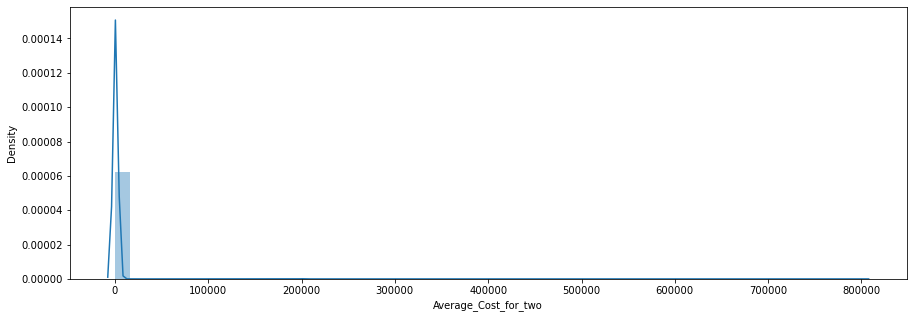

In [107]:
# View the distribution of Average cost for two - entire dataset

plt.figure(figsize = (15,5))
sns.distplot(StarRestaurant_country[StarRestaurant_country.Average_Cost_for_two != 0].Average_Cost_for_two)
plt.show()

C:\Users\jeeva\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


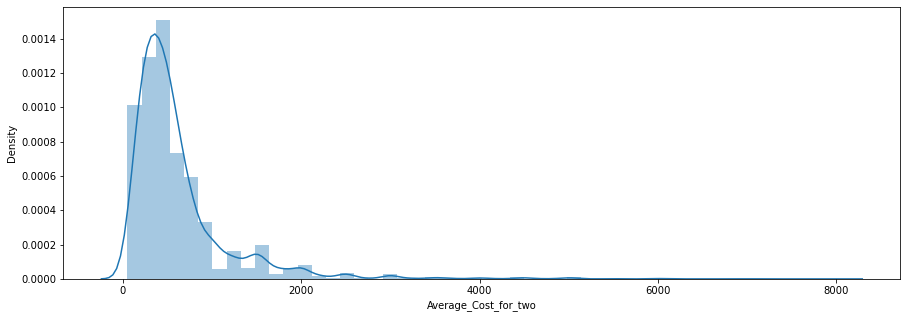

In [108]:
# View the distribution of Average cost for two - within Indian restaurants

plt.figure(figsize = (15,5))
sns.distplot(StartRestaurant_India[StartRestaurant_India.Average_Cost_for_two != 0].Average_Cost_for_two)
plt.show()

#### 11. Explore how ratings are distributed.

In [109]:
plt.rcParams['figure.figsize'] = (15, 5)

<AxesSubplot:xlabel='Aggregate_rating', ylabel='Count'>

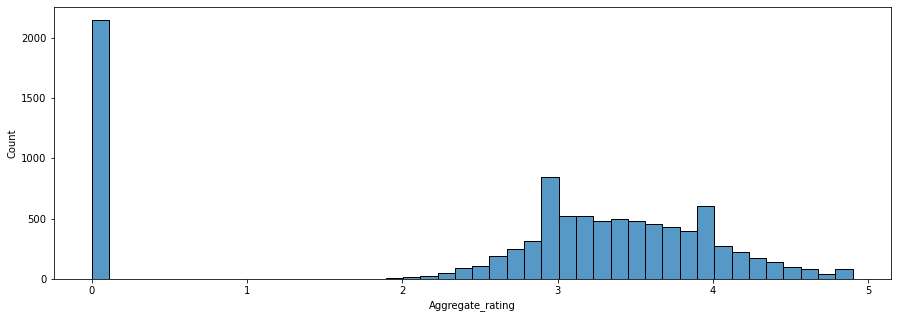

In [110]:
# View the central tendency of the Ratings
# View the Histogram for Ratings

sns.histplot(StarRestaurant_country.Aggregate_rating)

In [111]:
StarRestaurant_country['Rating_cat'] = StarRestaurant_country['Aggregate_rating'].round(0).astype(int)

<ipython-input-112-a8357d591cfd>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticks(),fontsize = 12)


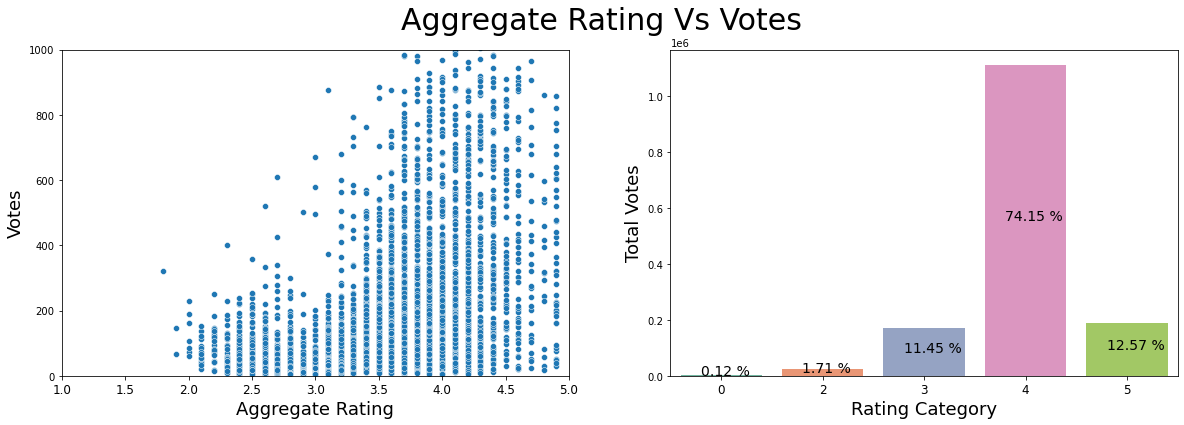

In [112]:
f,ax = plt.subplots(1,2,figsize=(20,6))
sns.scatterplot(data=StarRestaurant_country,x='Aggregate_rating',y='Votes', ax = ax[0], palette ='Set2')
agg = StarRestaurant_country.pivot_table(index = 'Rating_cat', values = 'Votes', aggfunc = 'sum').reset_index()
agg['Perc_votes']= (agg.Votes/agg.Votes.sum()*100).round(2)
sns.barplot(x = 'Rating_cat', y = 'Votes', data = agg, ax = ax[1], palette='Set2')
for i in range(len(agg)):
    ax[1].annotate(str(agg.Perc_votes[i])+' %', xy = (i-0.2,int(agg.Votes[i]/2)), fontsize = 14, fontweight = 'medium')
ax[0].set_ylim(0,1000)
ax[0].set_xlim(1,5)
ax[0].set_ylabel('Votes',fontsize = 18 )
ax[0].set_xlabel('Aggregate Rating',fontsize = 18 )
ax[0].set_xticklabels(ax[0].get_xticks(),fontsize = 12)
ax[1].set_ylabel('Total Votes',fontsize = 18 )
ax[1].set_xlabel('Rating Category',fontsize = 18 )
ax[1].set_xticklabels(agg.Rating_cat,fontsize = 12)
plt.suptitle('Aggregate Rating Vs Votes', size = 30)
plt.show()

C:\Users\jeeva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


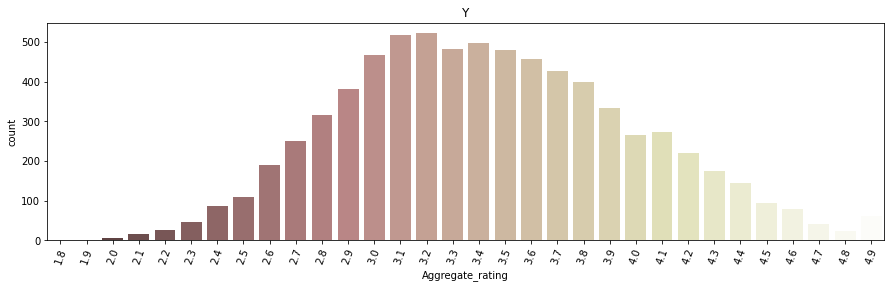

In [115]:
# View the number of restaurants vs Rating given by the customers.
plt.figure( figsize = (15, 4))
sns.countplot('Aggregate_rating', data = StarRestaurant_country[StarRestaurant_country.Aggregate_rating !=0] , palette = 'pink')
plt.tick_params('x', rotation = 70)
plt.title('Y')
plt.show()

In [116]:
# View the number of restaurants with differnt Rating Colors

StarRestaurant_country["Rating_color"].value_counts()

Orange        3737
White         2148
Yellow        2100
Green         1079
Dark Green     301
Red            186
Name: Rating_color, dtype: int64

In [117]:
# Grouping Rating color and Rating by average Aggregate rating given for each restaurant

Color_represents = StarRestaurant_country.groupby(['Rating_color'],as_index =False)['Aggregate_rating'].mean()
Color_represents.columns = ['Rating_color','Average_rating']
Color_represents =Color_represents.sort_values(by='Average_rating',ascending=False)
Color_represents = Color_represents[0:5]
Color_represents['Ratings'] = ['Excellent','Very Good','Good','Okay','Poor']
Color_represents

,Rating_color,Average_rating,Ratings
0,Dark Green,4.659801,Excellent
1,Green,4.168119,Very Good
5,Yellow,3.683429,Good
2,Orange,3.051619,Okay
3,Red,2.297849,Poor


#### 12. Explain the factors in the data that may have an effect on ratings e.g. No. of cuisines, cost, delivery option, etc.

In [118]:
# Group the restaurants based on the Cost by creating bins

StarRestaurant_country['Average_Cost_bin']= pd.cut(StarRestaurant_country[StarRestaurant_country.Average_Cost_for_two != 0].Average_Cost_for_two,
bins = [0, 200, 500, 1000, 3000, 5000,10000, 800000000],
labels = ['<=200', '<=500', '<=1000', '<=3000', '<=5000', '<=10000', 'nolimit'])

C:\Users\jeeva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


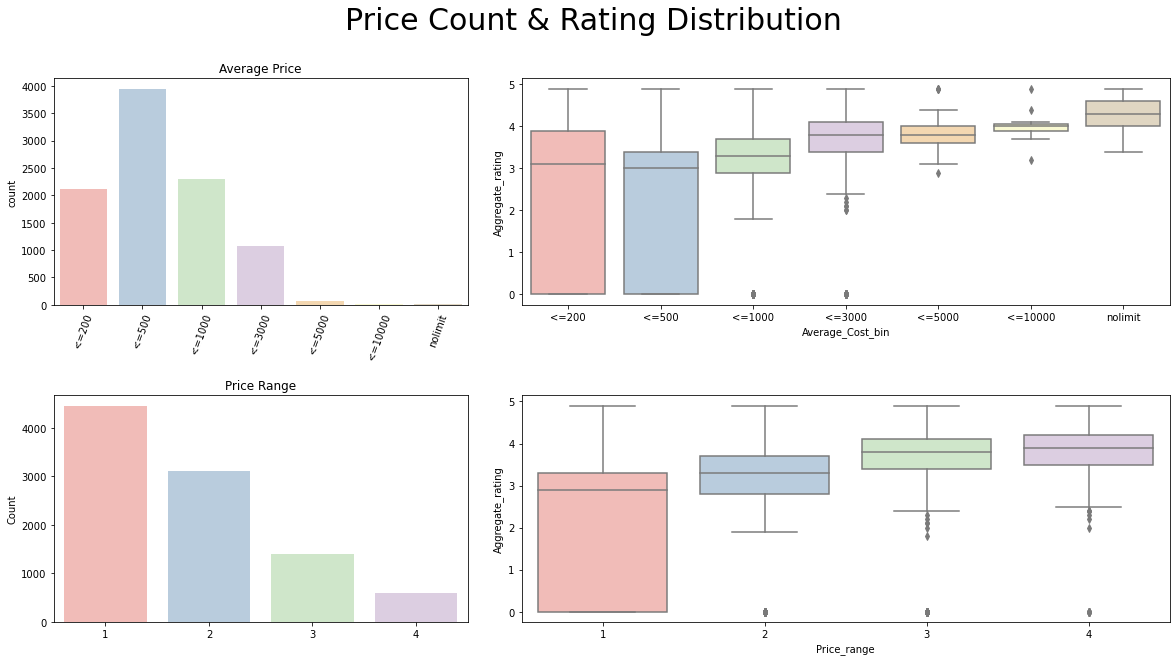

In [121]:
f = plt.figure(figsize = (20,10))
ax = plt.subplot2grid((2,5), (0,0),colspan = 2)
sns.countplot(StarRestaurant_country['Average_Cost_bin'], ax = ax, palette = sns.color_palette('Pastel1', 7))
ax.set_title('Average Price')
ax.set_xlabel('')
ax.tick_params('x', rotation = 70)
ax = plt.subplot2grid((2,5), (0,2), colspan = 3)
sns.boxplot(x = 'Average_Cost_bin', y = 'Aggregate_rating', data =StarRestaurant_country, ax = ax, palette = sns.color_palette('Pastel1', 7))
count = StarRestaurant_country['Price_range'].value_counts().reset_index()
count.columns = ['Price_range', 'Count']
ax = plt.subplot2grid((2,5), (1,0),colspan = 2)
sns.barplot(x = 'Price_range', y = 'Count', data = count, ax=ax, palette = sns.color_palette('Pastel1', 5))
ax.set_title('Price Range')
ax.set_xlabel('')
ax = plt.subplot2grid((2,5), (1,2), colspan = 3)
sns.boxplot(x='Price_range', y ='Aggregate_rating', data = StarRestaurant_country, ax = ax, palette = sns.color_palette('Pastel1', 5))
plt.subplots_adjust(wspace = 0.3, hspace = 0.4,)
plt.suptitle('Price Count & Rating Distribution', size = 30)
plt.show()

In [122]:
plt.rcParams['figure.figsize'] = (15,15)

<AxesSubplot:>

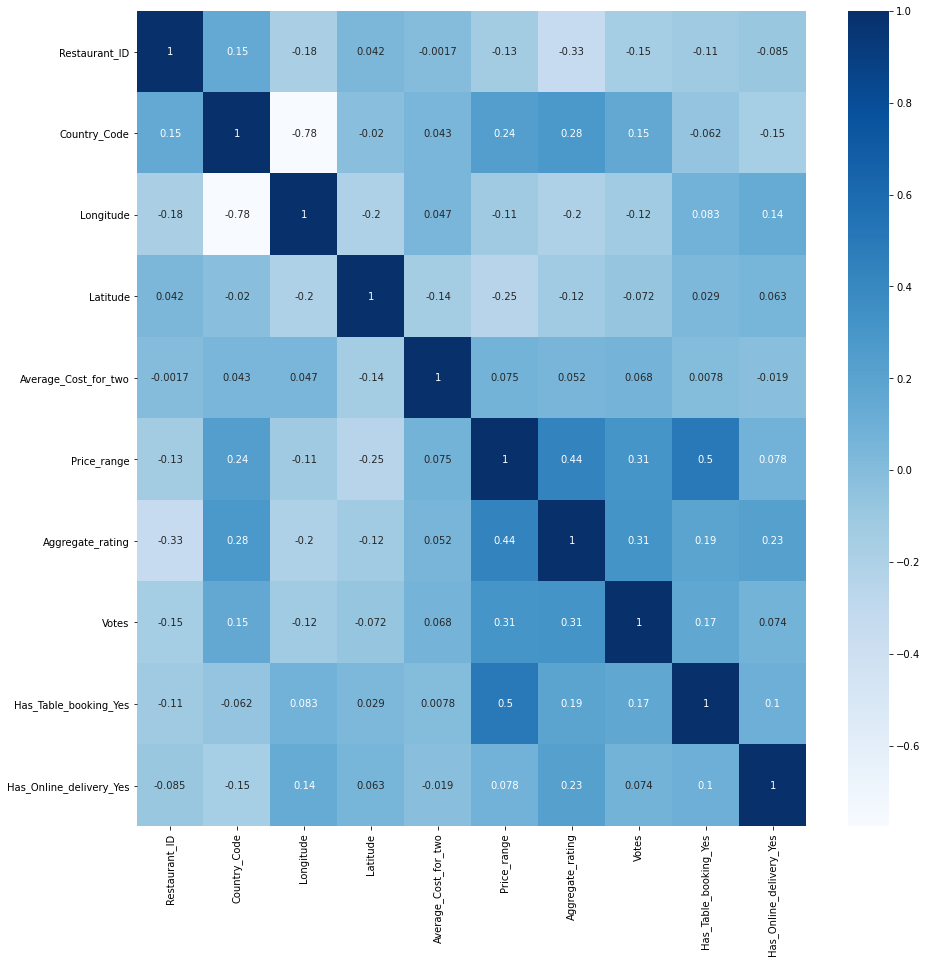

In [126]:
# View the Corelation between all the variables

colinearity_CVD=StarRestaurant_country_dummy.corr()

sns.heatmap(colinearity_CVD, annot=True, cmap='Blues' )

In [127]:
# We see that there is no single variable that affects the rating strongly, however table booking, 
# online delivery, average price for two and price range, number of votes do play a part in affecting 
# the rating of a restaurant.

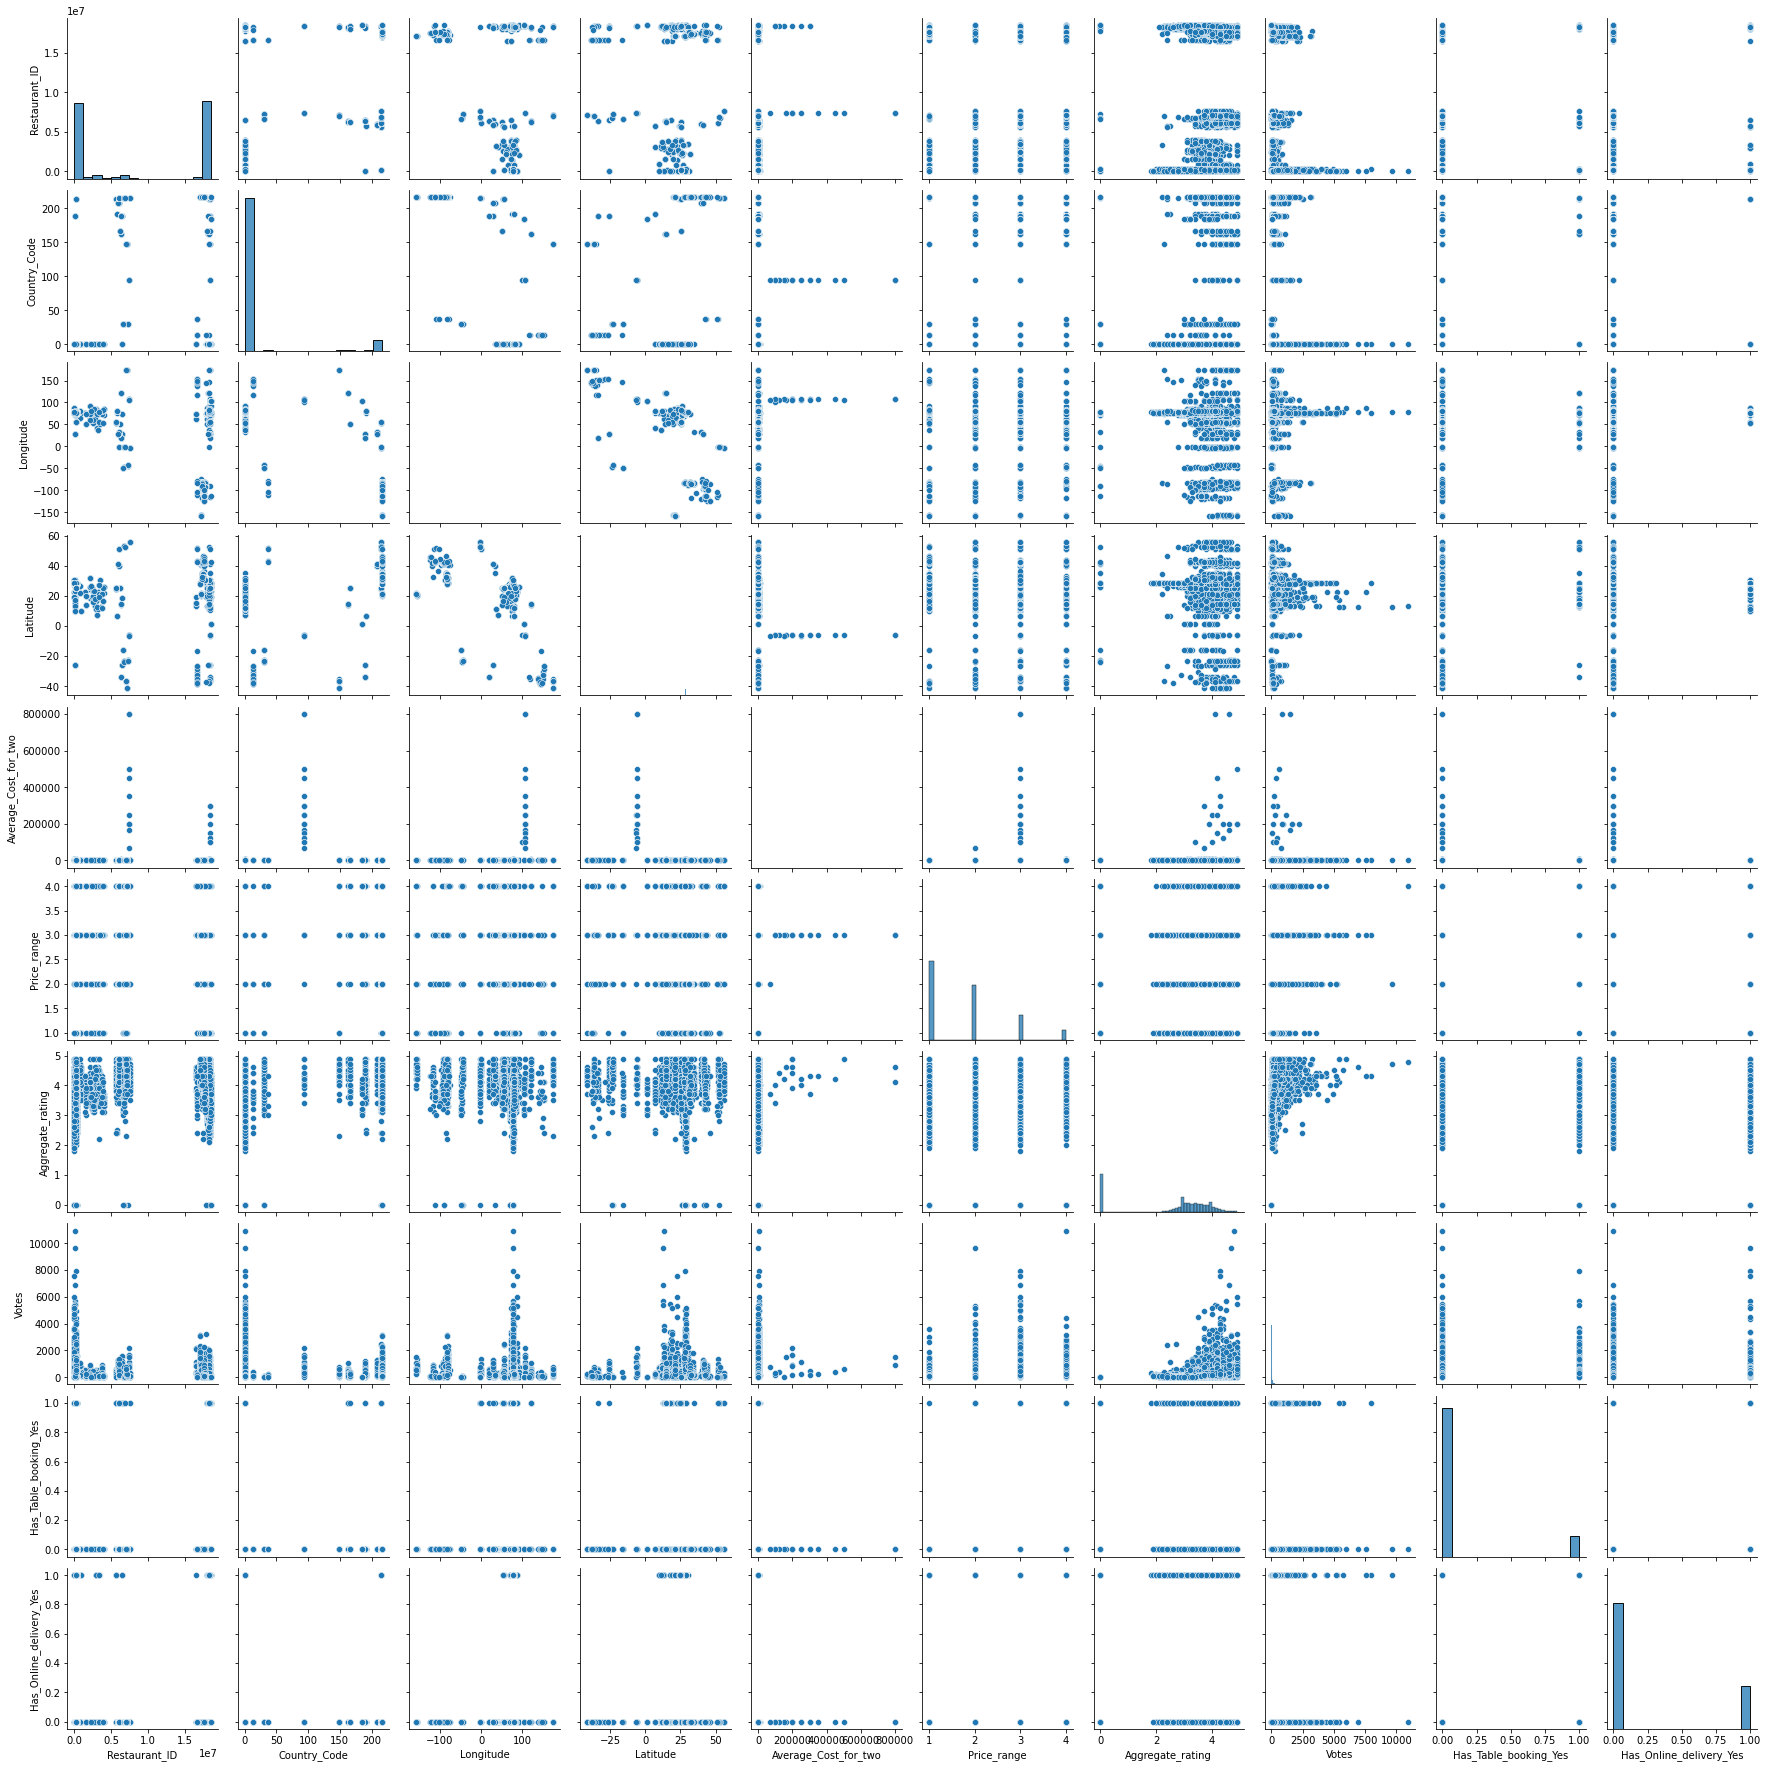

In [128]:
# View the relationship between the variables using pair plot

sns.pairplot(StarRestaurant_country_dummy)

In [129]:
# Following are the certain metrics that helps in recommending star restaurants.
# Table booking, online delivery options, average price for two and price range, number of votes and rating of a restaurant.
